# Euler condition
- It states that the marginal rate of substitution between consumption at two points in time should equal the gross return on investment over that period, adjusted for time preference.

# Case

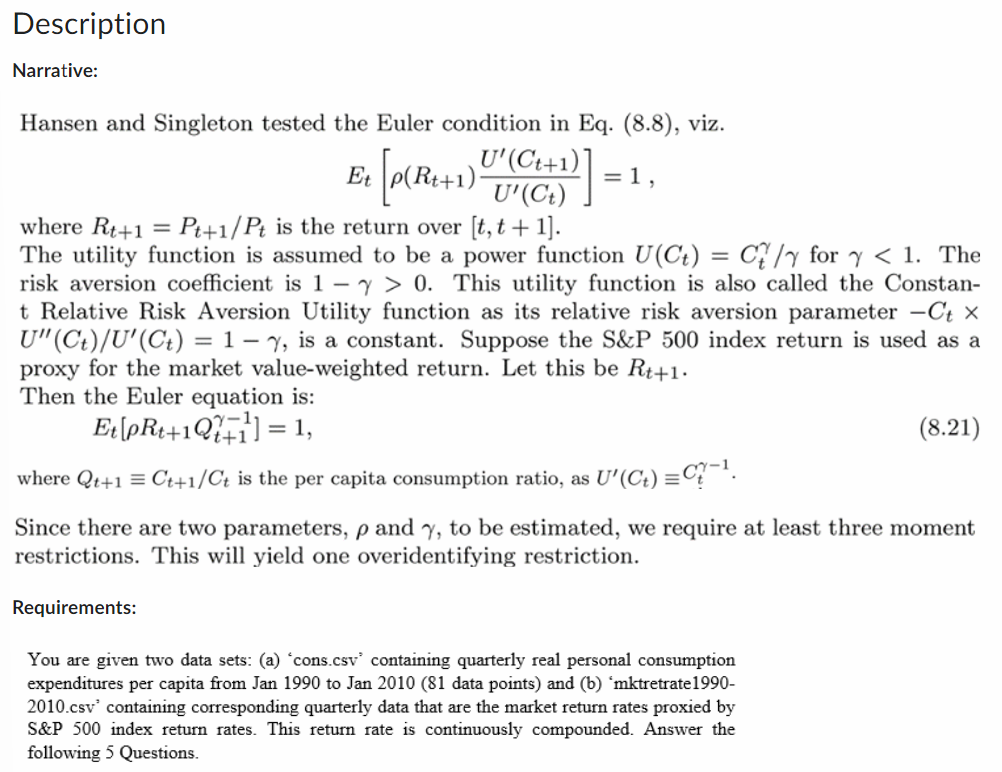

# Code

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.gmm import GMM

In [104]:
con = pd.read_csv('cons.csv')

con.head()

,Date,Cons
0,1/1/1990,24142
1,1/4/1990,24140
2,1/7/1990,24150
3,1/10/1990,23882
4,1/1/1991,23719


In [105]:
Con_1 = con['Cons'].shift(-1)

Con_1 

0     24140.0
1     24150.0
2     23882.0
3     23719.0
4     23839.0
       ...   
76    34120.0
77    34271.0
78    34154.0
79    34283.0
80        NaN
Name: Cons, Length: 81, dtype: float64

In [106]:
Ratio = Con_1 / con['Cons']

Ratio 

0     0.999917
1     1.000414
2     0.988903
3     0.993175
4     1.005059
        ...   
76    0.993044
77    1.004426
78    0.996586
79    1.003777
80         NaN
Name: Cons, Length: 81, dtype: float64

In [107]:
Ratio = Ratio[1:80]

Ratio

1     1.000414
2     0.988903
3     0.993175
4     1.005059
5     1.001426
        ...   
75    0.995423
76    0.993044
77    1.004426
78    0.996586
79    1.003777
Name: Cons, Length: 79, dtype: float64

In [108]:
mktretrate = pd.read_csv('mktretrate1990-2010.csv')

mktretrate

,Date,Mkretrate
0,1/1/1990,-0.033703
1,1/4/1990,0.005213
2,1/7/1990,0.073838
3,1/10/1990,-0.158324
4,1/1/1991,0.123410
...,...,...
76,1/1/2009,-0.159557
77,1/4/2009,0.055268
78,1/7/2009,0.123438
79,1/10/2009,0.048150


In [109]:
# R_t-1

mktretrate1 = mktretrate['Mkretrate'].shift(1)

mktretrate1

0          NaN
1    -0.033703
2     0.005213
3     0.073838
4    -0.158324
        ...   
76   -0.268700
77   -0.159557
78    0.055268
79    0.123438
80    0.048150
Name: Mkretrate, Length: 81, dtype: float64

In [110]:
# R_t+1

mktretrate2 = mktretrate['Mkretrate'].shift(-1)

mktretrate2

0     0.005213
1     0.073838
2    -0.158324
3     0.123410
4     0.087394
        ...   
76    0.055268
77    0.123438
78    0.048150
79    0.035718
80         NaN
Name: Mkretrate, Length: 81, dtype: float64

In [111]:
# R_t

mktretrate = mktretrate['Mkretrate'][1:80]

mktretrate

1     0.005213
2     0.073838
3    -0.158324
4     0.123410
5     0.087394
        ...   
75   -0.268700
76   -0.159557
77    0.055268
78    0.123438
79    0.048150
Name: Mkretrate, Length: 79, dtype: float64

In [112]:
# R_t-1

mktretrate1 = mktretrate1[1:80]

mktretrate1

1    -0.033703
2     0.005213
3     0.073838
4    -0.158324
5     0.123410
        ...   
75   -0.089174
76   -0.268700
77   -0.159557
78    0.055268
79    0.123438
Name: Mkretrate, Length: 79, dtype: float64

In [113]:
# R_t+1

mktretrate2 = mktretrate2[1:80]

mktretrate2

1     0.073838
2    -0.158324
3     0.123410
4     0.087394
5     0.032683
        ...   
75   -0.159557
76    0.055268
77    0.123438
78    0.048150
79    0.035718
Name: Mkretrate, Length: 79, dtype: float64

# Case
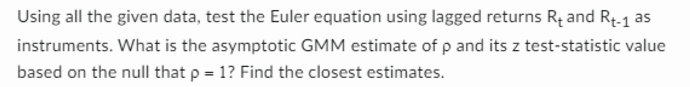
# Approach
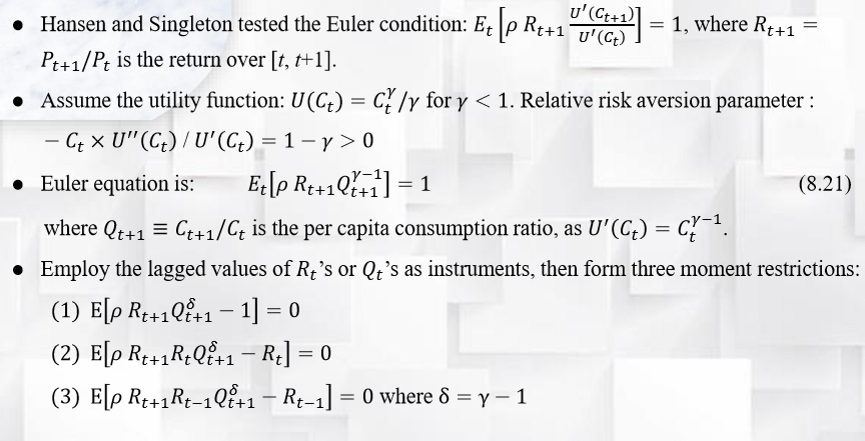


In [114]:
mktretrate2 = np.exp(mktretrate2)
mktretrate = np.exp(mktretrate)

In [115]:
# employ r_t-1 and q_t-1 as instruments 
inst = np.column_stack((np.ones(len(mktretrate)),mktretrate, mktretrate1))
inst

array([[ 1.00000000e+00,  1.00522669e+00, -3.37029990e-02],
       [ 1.00000000e+00,  1.07663241e+00,  5.21308100e-03],
       [ 1.00000000e+00,  8.53572933e-01,  7.38380270e-02],
       [ 1.00000000e+00,  1.13134868e+00, -1.58324289e-01],
       [ 1.00000000e+00,  1.09132672e+00,  1.23410447e-01],
       [ 1.00000000e+00,  1.03322321e+00,  8.73941340e-02],
       [ 1.00000000e+00,  1.01196462e+00,  3.26832470e-02],
       [ 1.00000000e+00,  1.04161040e+00,  1.18936120e-02],
       [ 1.00000000e+00,  1.01509369e+00,  4.07679730e-02],
       [ 1.00000000e+00,  1.02231594e+00,  1.49809170e-02],
       [ 1.00000000e+00,  9.86964003e-01,  2.20705850e-02],
       [ 1.00000000e+00,  1.04800803e+00, -1.31217110e-02],
       [ 1.00000000e+00,  1.00321346e+00,  4.68912440e-02],
       [ 1.00000000e+00,  1.01803767e+00,  3.20830300e-03],
       [ 1.00000000e+00,  1.04396046e+00,  1.78769170e-02],
       [ 1.00000000e+00,  1.02945514e+00,  4.30216130e-02],
       [ 1.00000000e+00,  9.36255476e-01

In [116]:
class gmm(GMM):
    def momcond(self,params):
        p0,p1 = params
        endog =self.endog #(Q_t+1)
        exog = self.exog.squeeze()  #(R_t)
        inst = self.instrument
        
        error_1 = p0 * exog * (endog ** (p1)) - 1
        error_2 = p0 * exog * inst[:,1] * (endog**p1)-inst[:,1]
        error_3 = p0 * exog * inst[:,2] * (endog**p1)-inst[:,2]
        
        g = np.column_stack((error_1, error_2, error_3))
        return g

initial0 = np.array([0.1, 0.1])
results = gmm(endog = Ratio.values,exog = mktretrate2.values, k_moms = 3, k_params =2 ,instrument = inst).fit(initial0)

results

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000277
         Iterations: 6
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000238
         Iterations: 4
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000237
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000237
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


In [118]:
# z test statistics when null hypothesis is p0=1

# Given values
estimate_p0 = 1.0141
null_value_p0 = 1
std_err_p0 = 0.028

# Calculate the z-test statistic for p0 with null hypothesis p0=1
z_statistic_p0 = (estimate_p0 - null_value_p0) / std_err_p0
z_statistic_p0


0.5035714285714286

In [117]:
print(results.summary())

                                 gmm Results                                  
Dep. Variable:                      y   Hansen J:                      0.01869
Model:                            gmm   Prob (Hansen J):                 0.891
Method:                           GMM                                         
Date:                Sun, 03 Mar 2024                                         
Time:                        18:07:36                                         
No. Observations:                  79                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0            1.0141      0.028     36.096      0.000       0.959       1.069
p 1           -7.0435      5.377     -1.310      0.190     -17.582       3.495


<font color='red'> null hypothesis for p0 and p1 are =0, for the p value of z test

# Case
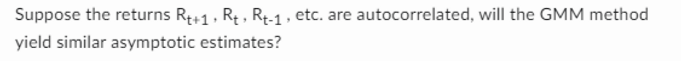

# Approach
- The validity of the instruments means that they are uncorrelated with the error terms. If the instruments themselves are not affected by the same autocorrelation as the regressors, the GMM estimates should remain consistent. However, if the instruments are also autocorrelated or invalid, this could lead to inconsistency. The presence of autocorrelation can affect the efficiency of the estimates but not necessarily their consistency if the instruments are valid. Hence the estimates will be similar
- In the context of your question, GMM should yield similar asymptotic estimates to the true parameter values if the instruments used are valid, even if the original variables are autocorrelated. If the instruments are valid, the GMM method corrects for the autocorrelation in the estimation process, hence the similar asymptotic estimates.

# Case
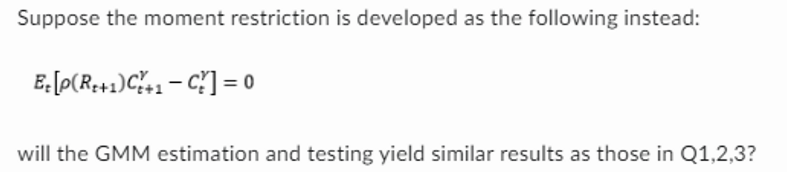
# Approach
-  If this alternative specification accurately reflects the theoretical model, the GMM estimation should provide similar results. However, if this specification incorrectly represents the underlying economic theory or the true data generating process, it could lead to different results. Since the question seems to suggest a valid alternative specification that still respects the theoretical model, the estimates should be asymptotically similar if the model is correctly specified. 